### Importing Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [2]:
raw_data = pd.read_excel('Assignment_Dataset.xlsx',header=0)

In [3]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

In [4]:
# Calculate the 30-day moving average of 'PR'
raw_data['PR_MA_30'] = raw_data['PR'].rolling(window=30).mean()

In [5]:
# Define the color map based on 'GHI' values
colors = np.where(raw_data['GHI'] < 2, 'blue',
                  np.where(raw_data['GHI'] < 4, 'lightblue',
                           np.where(raw_data['GHI'] < 6, 'orange', 'brown')))

In [6]:
#Getting co-ordinates for text plotting
from datetime import datetime

x_avg = '2021-08-01'
x_center='2020-04-01'
date_obj_avg = datetime.strptime(x_avg, '%Y-%m-%d')
date_obj_center = datetime.strptime(x_center, '%Y-%m-%d')
x_avg_num = mdates.date2num(date_obj_avg)
x_center_num = mdates.date2num(date_obj_center)



In [7]:
#Calculating avg PR of last n-days
raw_data.sort_values(by='Date')
day_par=[7,30,60,90,365,len(raw_data['PR'])]

avg={}
for days in day_par:
    avg[days]=float("{:.2f}".format(raw_data['PR'].tail(days).mean()))

In [8]:
#Initializing text for plotting
text=[]
for days, a in avg.items():
    if days==982:text.append("Average PR Lifetime:{}%".format(a))
    else:text.append("Average PR last {}-d:{}%".format(days,a))

In [9]:
#Calculating no. of PR values above Budget value 
initial_budget = 73.9
annual_decrease_rate = 0.008  # 0.8% expressed as a decimal

# Calculate the budget value for each day
raw_data['Budget'] = initial_budget * np.power(1 - annual_decrease_rate, (raw_data['Date'] - raw_data['Date'].min()).dt.days // 365)
target_budget_pr = len(raw_data[raw_data['PR'] > raw_data['Budget']])
#percentage
prcnt=float("{:.2f}".format((target_budget_pr/len(raw_data['PR']))*100))


48.68

### Visualizing Graph

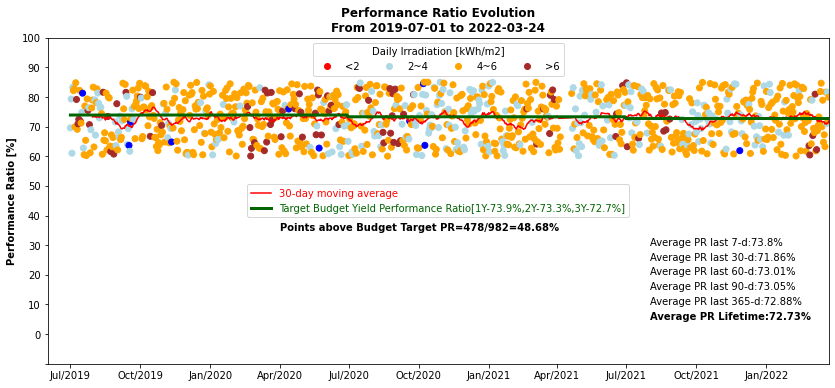

In [10]:
#Plotting the 'PR' column over time with moving average
fig,ax=plt.subplots(figsize=(14, 6))
plt.plot(raw_data['Date'], raw_data['PR_MA_30'], color='red', label='30-day moving average')



#Modifying y-axis to desired format
plt.ylabel('Performance Ratio [%]',fontweight="bold")
plt.ylim(-10, 100)
plt.title('Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24',fontweight="bold")
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
func = lambda x, pos: "" if np.isclose(x,-10) else int(x)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))


#Modifying x-axis to desired format
date_formatter = mdates.DateFormatter('%b/%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)
ax.set_xlim(pd.Timestamp('2019-06-01'), raw_data['Date'].max())

#Visualizing the budget line
start_value = 73.9
annual_reduction = 0.008
days = (raw_data['Date'] - raw_data['Date'].min()).dt.days
budget_line = start_value - (days // 365) * start_value * annual_reduction
line_plot=plt.plot(raw_data['Date'], budget_line, color='darkgreen', linewidth=3, label='Target Budget Yield Performance Ratio[1Y-73.9%,2Y-73.3%,3Y-72.7%]')




#Plotting the side average box
y=30
for i in text:
    if 'Lifetime' in i:plt.text(x_avg_num,y,i,weight='bold')
    else:plt.text(x_avg_num,y,i)
    y=y-5

#percent
txt="Points above Budget Target PR={}/{}={}%".format(target_budget_pr,len(raw_data['PR']),prcnt)

#Plotting the side average box
plt.text(x_center_num,35,txt,weight='bold')

plt.scatter(raw_data['Date'], raw_data['PR'],color=colors, cmap='jet', label='PR')
# Create custom legend labels for the colors
legend_labels = ['<2', '2~4','4~6','>6']
legend_colors = ['red', 'lightblue','orange','brown']
legend_handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in legend_colors]

# Create the legend
legend_title = 'Daily Irradiation [kWh/m2]'
scatter_legend=plt.legend(legend_handles, legend_labels, title=legend_title, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4)
# Add the scatter legend back to the plot
plt.gca().add_artist(scatter_legend)

# Create the legend for the line plot
line_legend=plt.legend(loc='center', labels=['30-day moving average','Target Budget Yield Performance Ratio[1Y-73.9%,2Y-73.3%,3Y-72.7%]'],labelcolor='linecolor')


plt.savefig('Final.jpg')
